In [1]:
import sys
sys.path

['C:\\Users\\ACER\\Desktop\\Microsoft\\Python\\Vision',
 'C:\\Users\\ACER\\AppData\\Local\\Programs\\Python\\Python38\\python38.zip',
 'C:\\Users\\ACER\\AppData\\Local\\Programs\\Python\\Python38\\DLLs',
 'C:\\Users\\ACER\\AppData\\Local\\Programs\\Python\\Python38\\lib',
 'C:\\Users\\ACER\\AppData\\Local\\Programs\\Python\\Python38',
 '',
 'C:\\Users\\ACER\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'C:\\Users\\ACER\\AppData\\Roaming\\Python\\Python38\\site-packages\\win32',
 'C:\\Users\\ACER\\AppData\\Roaming\\Python\\Python38\\site-packages\\win32\\lib',
 'C:\\Users\\ACER\\AppData\\Roaming\\Python\\Python38\\site-packages\\Pythonwin',
 'C:\\Users\\ACER\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages',
 'C:\\Users\\ACER\\AppData\\Roaming\\Python\\Python38\\site-packages\\IPython\\extensions',
 'C:\\Users\\ACER\\.ipython']

In [2]:
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import json
from PIL import Image
from io import BytesIO
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
#from IPython.display import Image

from array import array
import os
import sys
import time

# Computer Vision subscription key and endpoint to your environment variables.

endpoint = 'https://vision-dost.cognitiveservices.azure.com/'
    
subscription_key = '3d6900522ddf4184bc78d5d18c4f6213'

In [3]:
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

===== Describe an image - remote =====
Description of remote image: 
'a large stone structure with many arches with Colosseum in the background' with confidence 26.39%


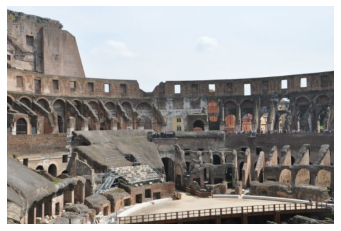

In [4]:
remote_image_url = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/landmark.jpg"
'''
Describe an Image - remote
This example describes the contents of an image with the confidence score.
'''
print("===== Describe an image - remote =====")
# Call API
description_results = computervision_client.describe_image(remote_image_url)

# Get the captions (descriptions) from the response, with confidence level
image = Image.open(BytesIO(requests.get(remote_image_url).content))
plt.imshow(image)
plt.axis("off")

print("Description of remote image: ")
if (len(description_results.captions) == 0):
    print("No description detected.")
else:
    for caption in description_results.captions:
        print("'{}' with confidence {:.2f}%".format(caption.text, caption.confidence * 100))
        
 

In [13]:
description_results.captions

Thumbnail is 50-by-50


(-0.5, 49.5, 49.5, -0.5)

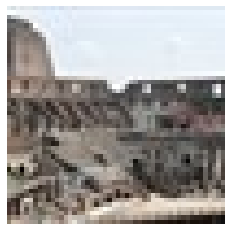

In [5]:
thumbnail_url = endpoint + "vision/v3.1/generateThumbnail"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/landmark.jpg"

# Construct URL
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'width': '50', 'height': '50', 'smartCropping': 'true'}
data = {'url': image_url}
# Call API
response = requests.post(thumbnail_url, headers=headers, params=params, json=data)
response.raise_for_status()

# Open the image from bytes
thumbnail = Image.open(BytesIO(response.content))

# Verify the thumbnail size.
print("Thumbnail is {0}-by-{1}".format(*thumbnail.size))

# Save thumbnail to file
thumbnail.save('thumbnail.png')

# Display the thumbnail from Jupyter.
plt.imshow(thumbnail)
plt.axis("off")

# Display image in PC
#thumbnail.show()

===== Categorize an image - remote =====
Categories from remote image: 
'building_' with confidence 31.64%
'others_' with confidence 0.39%
'outdoor_' with confidence 3.91%


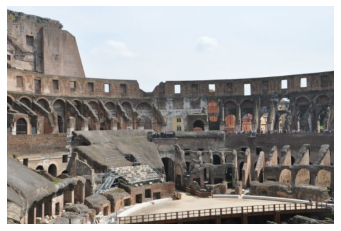

In [6]:
remote_image_url = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/landmark.jpg"
'''
Categorize an Image - remote
This example extracts (general) categories from a remote image with a confidence score.
'''
print("===== Categorize an image - remote =====")
# Select the visual feature(s) you want.
remote_image_features = ["categories"]
# Call API with URL and features
categorize_results_remote = computervision_client.analyze_image(remote_image_url , remote_image_features)

# Print results with confidence score
image = Image.open(BytesIO(requests.get(remote_image_url).content))
plt.imshow(image)
plt.axis("off")
print("Categories from remote image: ")
if (len(categorize_results_remote.categories) == 0):
    print("No categories detected.")
else:
    for category in categorize_results_remote.categories:
        print("'{}' with confidence {:.2f}%".format(category.name, category.score * 100))

In [7]:
remote_image_url = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/landmark.jpg"
'''
Tag an Image - remote
This example returns a tag (key word) for each thing in the image.
'''
print("===== Tag an image - remote =====")
# Call API with remote image
tags_result_remote = computervision_client.tag_image(remote_image_url )

# Print results with confidence score
print("Tags in the remote image: ")
if (len(tags_result_remote.tags) == 0):
    print("No tags detected.")
else:
    for tag in tags_result_remote.tags:
        print("'{}' with confidence {:.2f}%".format(tag.name, tag.confidence * 100))

===== Tag an image - remote =====
Tags in the remote image: 
'building' with confidence 99.92%
'outdoor' with confidence 97.66%
'sky' with confidence 93.79%
'ruins' with confidence 76.13%
'amphitheatre' with confidence 56.34%


===== Detect Objects - remote =====
Detecting objects in remote image:
object at location 213, 365, 85, 208
object at location 218, 402, 179, 384
object at location 238, 417, 298, 416
object at location 116, 419, 60, 386


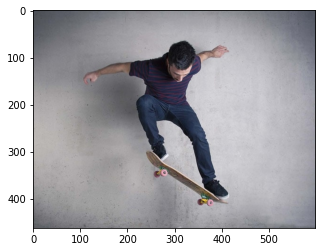

In [8]:
'''
Detect Objects - remote
This example detects different kinds of objects with bounding boxes in a remote image.
'''
print("===== Detect Objects - remote =====")
# Get URL image with different objects
remote_image_url_objects = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/objects.jpg"
# Call API with URL
detect_objects_results_remote = computervision_client.detect_objects(remote_image_url_objects)

# Print detected objects results with bounding boxes
image = Image.open(BytesIO(requests.get(remote_image_url_objects).content))
plt.imshow(image)

print("Detecting objects in remote image:")

if len(detect_objects_results_remote.objects) == 0:
    print("No objects detected.")
else:
    for object in detect_objects_results_remote.objects:
        print("object at location {}, {}, {}, {}".format( \
        object.rectangle.x, object.rectangle.x + object.rectangle.w, \
        object.rectangle.y, object.rectangle.y + object.rectangle.h))

===== Detect Brands - remote =====
Detecting brands in remote image: 
'Microsoft' brand detected with confidence 62.5% at location 58, 113, 106, 152
'Microsoft' brand detected with confidence 69.8% at location 58, 260, 86, 149


(-0.5, 298.5, 212.5, -0.5)

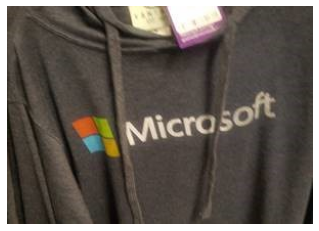

In [9]:
'''
Detect Brands - remote
This example detects common brands like logos and puts a bounding box around them.
'''
print("===== Detect Brands - remote =====")
# Get a URL with a brand logo
remote_image_url_brand = "https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/gray-shirt-logo.jpg"
# Select the visual feature(s) you want
remote_image_features = ["brands"]
# Call API with URL and features
detect_brands_results_remote = computervision_client.analyze_image(remote_image_url_brand, remote_image_features)

print("Detecting brands in remote image: ")
if len(detect_brands_results_remote.brands) == 0:
    print("No brands detected.")
else:
    for brand in detect_brands_results_remote.brands:
        print("'{}' brand detected with confidence {:.1f}% at location {}, {}, {}, {}".format( \
        brand.name, brand.confidence * 100, brand.rectangle.x, brand.rectangle.x + brand.rectangle.w, \
        brand.rectangle.y, brand.rectangle.y + brand.rectangle.h))

image = Image.open(BytesIO(requests.get(remote_image_url_brand).content))
plt.imshow(image)
plt.axis("off")

===== Detect Faces - remote =====
Faces in the remote image: 
'Male' of age 39 at location 118, 159, 212, 253
'Male' of age 54 at location 492, 111, 582, 201
'Female' of age 55 at location 18, 153, 102, 237
'Female' of age 33 at location 386, 166, 467, 247
'Female' of age 18 at location 235, 158, 311, 234
'Female' of age 8 at location 323, 163, 391, 231


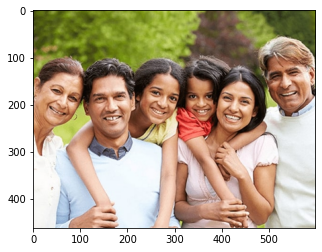

In [10]:
'''
Detect Faces - remote
This example detects faces in a remote image, gets their gender and age, 
and marks them with a bounding box.
'''
print("===== Detect Faces - remote =====")
# Get an image with faces
remote_image_url_faces = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/faces.jpg"
# Select the visual feature(s) you want.
remote_image_features = ["faces"]
# Call the API with remote URL and features
detect_faces_results_remote = computervision_client.analyze_image(remote_image_url_faces, remote_image_features)

# Print the results with gender, age, and bounding box
print("Faces in the remote image: ")
if (len(detect_faces_results_remote.faces) == 0):
    print("No faces detected.")
else:
    for face in detect_faces_results_remote.faces:
        print("'{}' of age {} at location {}, {}, {}, {}".format(face.gender, face.age, \
        face.face_rectangle.left, face.face_rectangle.top, \
        face.face_rectangle.left + face.face_rectangle.width, \
        face.face_rectangle.top + face.face_rectangle.height))
image = Image.open(BytesIO(requests.get(remote_image_url_faces).content))
plt.imshow(image)

In [11]:
remote_image_url_faces = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/faces.jpg"
'''
Detect Adult or Racy Content - remote
This example detects adult or racy content in a remote image, then prints the adult/racy score.
The score is ranged 0.0 - 1.0 with smaller numbers indicating negative results.
'''
print("===== Detect Adult or Racy Content - remote =====")
# Select the visual feature(s) you want
remote_image_features = ["adult"]
# Call API with URL and features
detect_adult_results_remote = computervision_client.analyze_image(remote_image_url_faces, remote_image_features)

# Print results with adult/racy score
print("Analyzing remote image for adult or racy content ... ")
print("Is adult content: {} with confidence {:.2f}".format(detect_adult_results_remote.adult.is_adult_content, detect_adult_results_remote.adult.adult_score * 100))
print("Has racy content: {} with confidence {:.2f}".format(detect_adult_results_remote.adult.is_racy_content, detect_adult_results_remote.adult.racy_score * 100))

===== Detect Adult or Racy Content - remote =====
Analyzing remote image for adult or racy content ... 
Is adult content: False with confidence 0.21
Has racy content: False with confidence 0.59
